In [2]:
import csv as csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import scipy.optimize as opt  
from sklearn import metrics, linear_model, tree, ensemble
from sklearn.grid_search import GridSearchCV

import math

In [3]:
initTrain = pd.read_csv('./input/train.csv', header=0)
print("0) train shape {}".format(initTrain.shape))
initFinal = pd.read_csv('./input/test.csv', header=0)
print("0) final set shape {}".format(initFinal.shape))


0) train shape (42000, 785)
0) final set shape (28000, 784)


In [4]:
print(math.sqrt(784))
initTrain.head()

28.0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


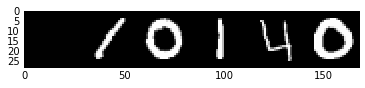

In [5]:
numbers = np.ones((28,28))
for i in range(0,5):
    number = initTrain.drop(['label'],axis=1).iloc[i].reshape(28,28)
    numbers = np.concatenate((numbers, number), axis=1)
plt.imshow(numbers, cmap='gray', interpolation='nearest')

In [6]:
def trainAndTest(clf, test_size=20):
    x_train = Xtrain[:test_size]
    y_train = ytrain[:test_size]
    x_test = Xtrain[test_size:]
    y_test = ytrain[test_size:]
    clf.fit(x_train, y_train)
    print (clf.best_score_, clf.best_params_)
    model = clf.best_estimator_
    predictions = model.predict(x_train)  
    name = type(model).__name__
    print(name)
    print("Train Accuracy {x}, F1 score {f}".format(x=metrics.accuracy_score(predictions, y_train), f=metrics.f1_score(predictions, y_train)))
    predictions_test = model.predict(x_test)  

    accuracy = metrics.accuracy_score(predictions_test, y_test)
    f1_score = metrics.f1_score(predictions_test, y_test)
    print("Test Accuracy {x}, F1 score {f}".format(x=accuracy, f=f1_score))
    return {'accuracy': accuracy, f1_score: f1_score, 'model': model, 'name': name, 'predictions': predictions_test}

In [7]:
Xtrain = initTrain.drop(['label'], axis=1).values
ytrain = initTrain.label.values
Xfinal = initFinal.values

test_size = int(len(initTrain)/4)
random_param_grid = { 
#     'n_estimators': [100], 
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth':list(range(7,15))
    'n_estimators': [500], 
    'max_features': ['sqrt'],
    'max_depth':[20]

}
clf = GridSearchCV(ensemble.RandomForestClassifier(), random_param_grid,n_jobs=4)

result = trainAndTest(clf, test_size)

0.946 {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}
RandomForestClassifier
Train Accuracy 1.0, F1 score 1.0


/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


Test Accuracy 0.953015873015873, F1 score 0.9530790997183312


/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [8]:
# model = ensemble.RandomForestClassifier(n_estimators= 1000, max_depth= 50, max_features= 'sqrt')
# model.fit(Xtrain, ytrain)
# yFinal = model.predict(Xfinal)
yFinal = result["model"].predict(Xfinal)

#### Printing and comparing 5 random values

[7 7 3 0 7]


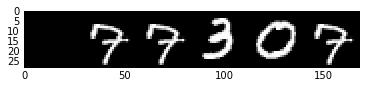

In [10]:
arr = np.random.choice(10, 5)
print(yFinal[arr])
printed = np.ones((28,28))
for i in range(0,len(arr)):
    number = Xfinal[arr[i]].reshape(28,28)
    printed = np.concatenate((printed, number), axis=1)
plt.imshow(printed, cmap='gray', interpolation='nearest')


In [11]:
output =  pd.DataFrame({'ImageId': np.arange(1, len(yFinal)+1), 'Label':yFinal})
output.to_csv('./output/submission.csv', index=False)